<a href="https://colab.research.google.com/github/Meghana1303/ML_Sentiment_Label_Model/blob/master/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB, BernoulliNB
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr

%matplotlib inline

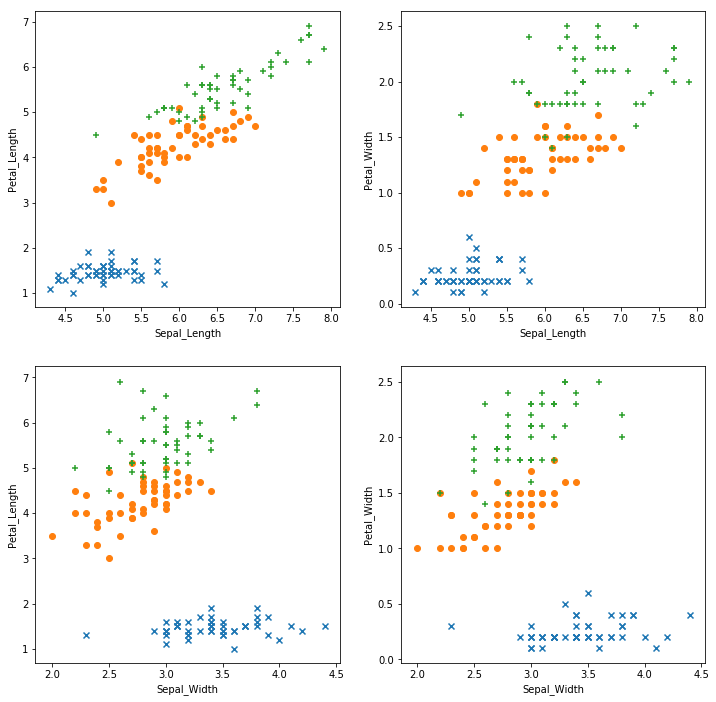

In [2]:
def plot_iris(iris):
    '''Function to plot iris data by type'''
    setosa = iris[iris['Species'] == 'setosa']
    versicolor = iris[iris['Species'] == 'versicolor']
    virginica = iris[iris['Species'] == 'virginica']
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    for i in range(2):
        for j in range(2):
            ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = 'x')
            ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = 'o')
            ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = '+')
            ax[i,j].set_xlabel(x_ax[i])
            ax[i,j].set_ylabel(y_ax[j])
            
## Import the dataset from sklearn.datasets
iris = datasets.load_iris()

## Create a data frame from the dictionary
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species

## Plot views of the iris data            
plot_iris(iris) 

In [0]:
Features = np.array(iris[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])

levels = {'setosa':0, 'versicolor':1, 'virginica':2}
Labels =  np.array([levels[x] for x in iris['Species']])

In [0]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 100)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [0]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

In [6]:
NB_mod = GaussianNB()
NB_mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
X_test = scale.transform(X_test)
scores = NB_mod.predict(X_test)

In [8]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Setosa   Score Versicolor    Score Virginica')
    print('Actual Setosa      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Versicolor  %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Vriginica   %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Setosa  Versicolor  Virginica')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores) 

                 Confusion matrix
                 Score Setosa   Score Versicolor    Score Virginica
Actual Setosa          35                0                 0
Actual Versicolor       0               27                 7
Actual Vriginica        0                2                29

Accuracy        0.91
 
          Setosa  Versicolor  Virginica
Num case   35.00     34.00      31.00
Precision   1.00      0.93       0.81
Recall      1.00      0.79       0.94
F1          1.00      0.86       0.87


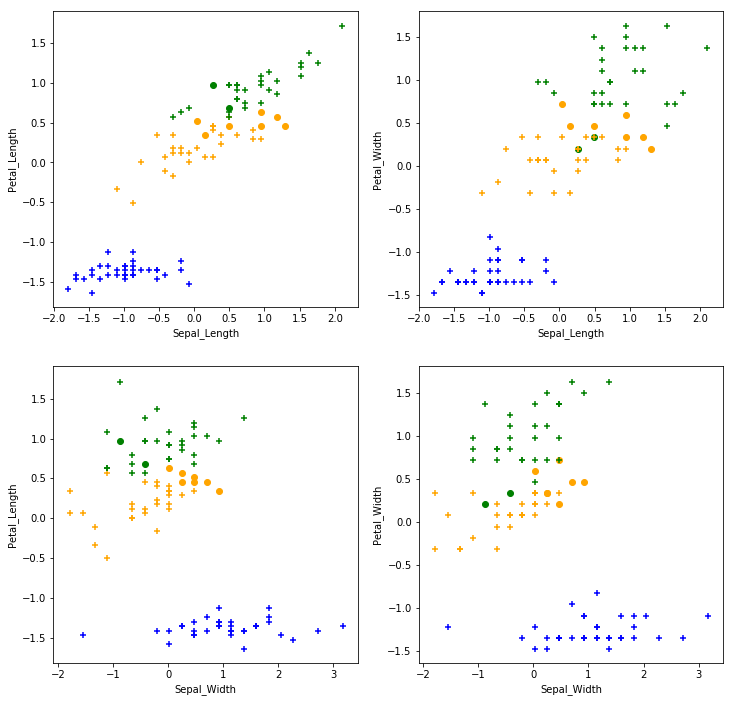

In [9]:
def plot_iris_score(iris, y_test, scores):
    '''Function to plot iris data by type'''
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    
    ## Create data frame from the test data
    iris = pd.DataFrame(iris)
    levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
    iris['Species'] = [levels[x] for x in y_test]
    iris.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
    
    ## Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    
    for t in range(2): # loop over correct and incorect classifications
        setosa = iris[(iris['Species'] == 'setosa') & (true == t)]
        versicolor = iris[(iris['Species'] == 'versicolor') & (true == t)]
        virginica = iris[(iris['Species'] == 'virginica') & (true == t)]
        # loop over all the dimensions
        for i in range(2):
            for j in range(2):
                ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = markers[t], color = 'green')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_iris_score(X_test, y_test, scores)

In [11]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Credit_Features.csv to Credit_Features (2).csv
User uploaded file "Credit_Features.csv" with length 202317 bytes


In [12]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Credit_Labels.csv to Credit_Labels (2).csv
User uploaded file "Credit_Labels.csv" with length 2002 bytes


In [13]:
Features = np.array(pd.read_csv('Credit_Features.csv'))
Labels = np.array(pd.read_csv('Credit_Labels.csv'))
Labels = Labels.reshape(Labels.shape[0],)
print(Features.shape)
print(Labels.shape)

(1000, 35)
(1000,)


In [14]:
nr.seed(321)
cv_folds = ms.KFold(n_splits=10, shuffle = True)
    
nr.seed(498)
NB_credit = GaussianNB()
cv_estimate = ms.cross_val_score(NB_credit, Features, Labels, 
                                 cv = cv_folds) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.691
SDT of the metric       = 0.093
Outcomes by cv fold
Fold  1    0.720
Fold  2    0.660
Fold  3    0.770
Fold  4    0.690
Fold  5    0.750
Fold  6    0.430
Fold  7    0.690
Fold  8    0.760
Fold  9    0.710
Fold 10    0.730


In [15]:
nr.seed(498)
NB_credit = GaussianNB()
cv_estimate = ms.cross_val_score(NB_credit, Features, Labels, 
                                 cv = 10) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.679
SDT of the metric       = 0.106
Outcomes by cv fold
Fold  1    0.670
Fold  2    0.390
Fold  3    0.680
Fold  4    0.710
Fold  5    0.760
Fold  6    0.770
Fold  7    0.620
Fold  8    0.760
Fold  9    0.730
Fold 10    0.700


In [0]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [17]:
NB_credit_mod = GaussianNB() 
NB_credit_mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = NB_credit_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive        30               182
Actual negative         6                82

Accuracy        0.37
AUC             0.69
Macro precision 0.57
Macro recall    0.54
 
           Positive      Negative
Num case      212            88
Precision    0.83          0.31
Recall       0.14          0.93
F1           0.24          0.47


In [19]:
Features = Features[:,4:]
Features[:3,:]

array([[0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.]])

In [0]:
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

In [21]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
## Define the NB regression model
NB_clf = BernoulliNB() 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = NB_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(Features, Labels)
print(clf.best_estimator_.alpha)

1


In [22]:
#NB_credit = BernoulliNB(alpha = clf.best_estimator_.alpha)
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.754
SDT of the metric       = 0.040
Outcomes by cv fold
Fold  1    0.735
Fold  2    0.701
Fold  3    0.733
Fold  4    0.745
Fold  5    0.771
Fold  6    0.757
Fold  7    0.762
Fold  8    0.857
Fold  9    0.765
Fold 10    0.713


In [0]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [0]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [25]:
NB_credit_mod = BernoulliNB(alpha = clf.best_estimator_.alpha,
                            class_prior = [0.4,0.6]) 
NB_credit_mod.fit(X_train, y_train)
probabilities = NB_credit_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive       116                96
Actual negative        17                71

Accuracy        0.62
AUC             0.78
Macro precision 0.65
Macro recall    0.68
 
           Positive      Negative
Num case      212            88
Precision    0.87          0.43
Recall       0.55          0.81
F1           0.67          0.56
